# logest common subsequence problem :
### first of we should know the diffrence b/w longest common subsequence and subs-string 
### sub-string is the string derived from original-string(relatively larger in length) which has common characters with same relative-order wrt original-string and not allowed to delete characters in between from original-string to match derived string, in sub-string order of characters should be absolute (as its wrt to original-string)

### common-subsequence is the string derived string from original-string(relatively larger in length) which has common character with same relative order wrt original string and we can delete character in between from original-string to match derived string., in common subsequence its not necesscary that the order of characters should be absolute.

- Example : 
- abcedefh (original-string )
- cede (sub-string of above original-string)  //has same relative order of characters and this order is absolute as it's as compared to original-string ; as no chars deleted in between  
- acdef (common subsequence of above original-string)  //has same relative order of characters but some chars deleted in between as compared to original string 

# longest common subsequence question(with example):
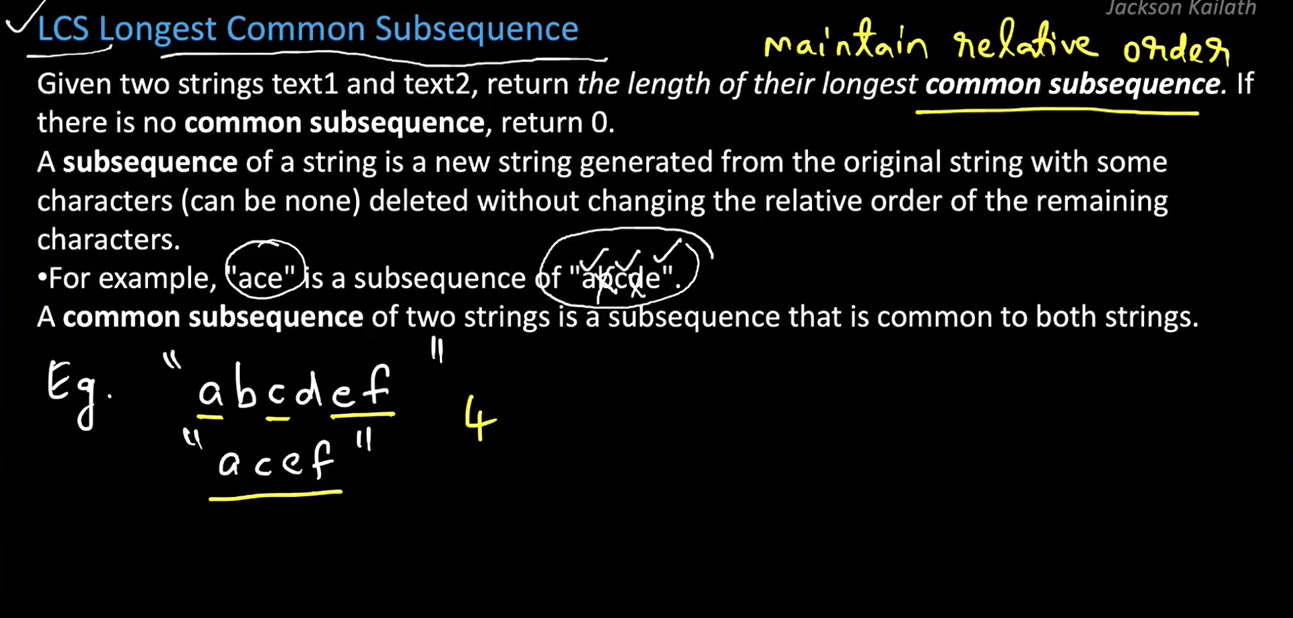
# longest common subsequence clarifying question:
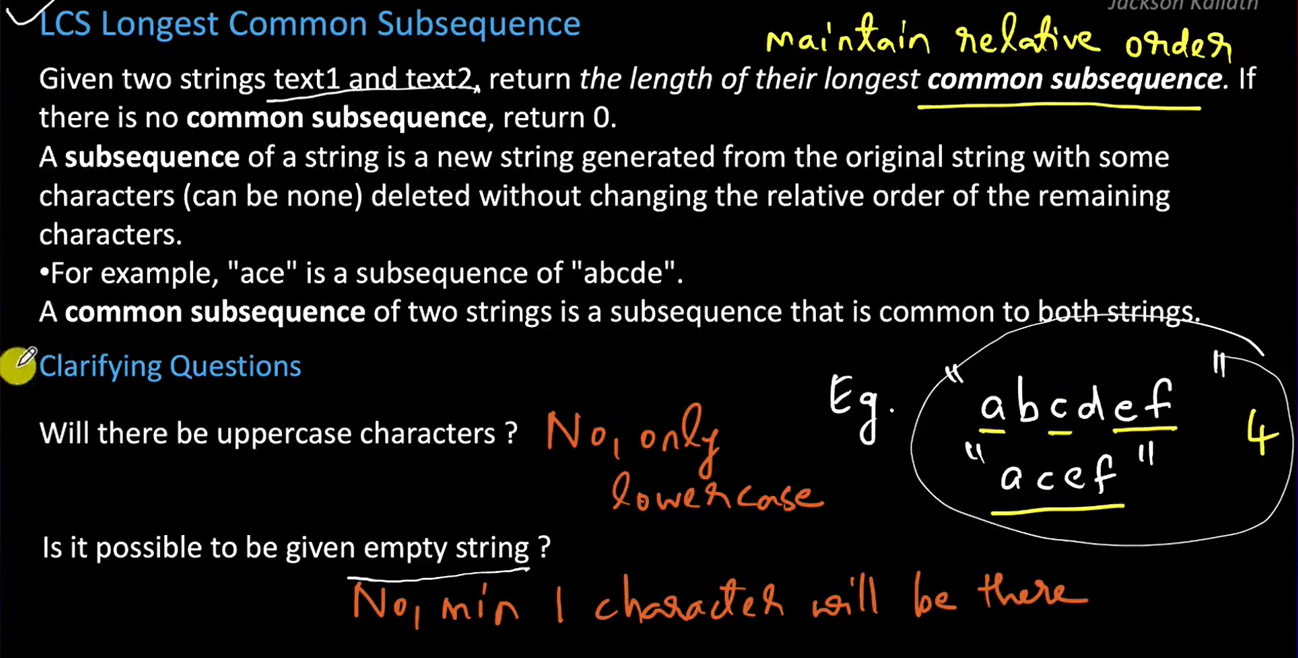
# longest common subsequence test-cases:
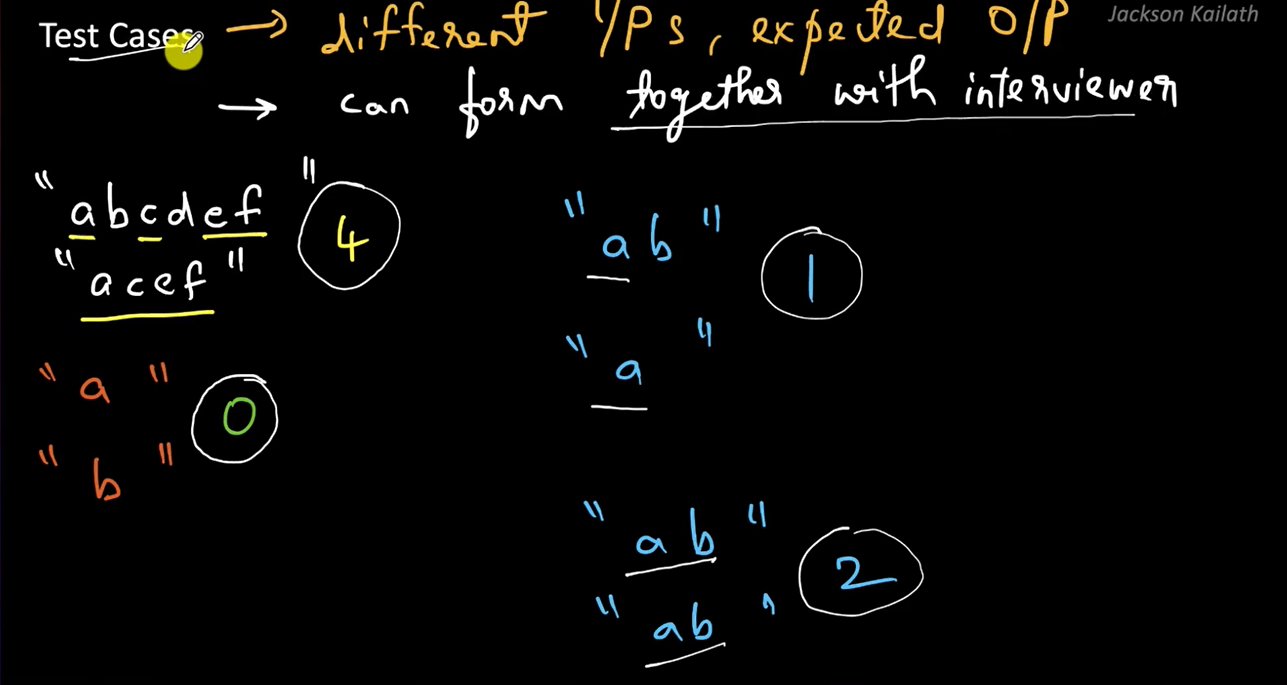
# Coding Exercise: LCS ( Longest Common Subsequence)
### Given two strings text1 and text2, return the length of their longest common subsequence. If there is no common subsequence, return 0.

### A subsequence of a string is a new string generated from the original string with some characters (can be none) deleted without changing the relative order of the remaining characters.

- For example, "ace" is a subsequence of "abcde".

- A common subsequence of two strings is a subsequence that is common to both strings.

- Example: 

Input: text1 = "pbcdq", text2 = "pcq" 

Output: 3  

Explanation: The longest common subsequence is "pcq" and its length is 3.

# longest common subsequence tabulation(bottom-up) approach:
### as we already know that tabulation approach is iterative method whereas we filled up cells of 2-d dp_table iteratively using formulas. 
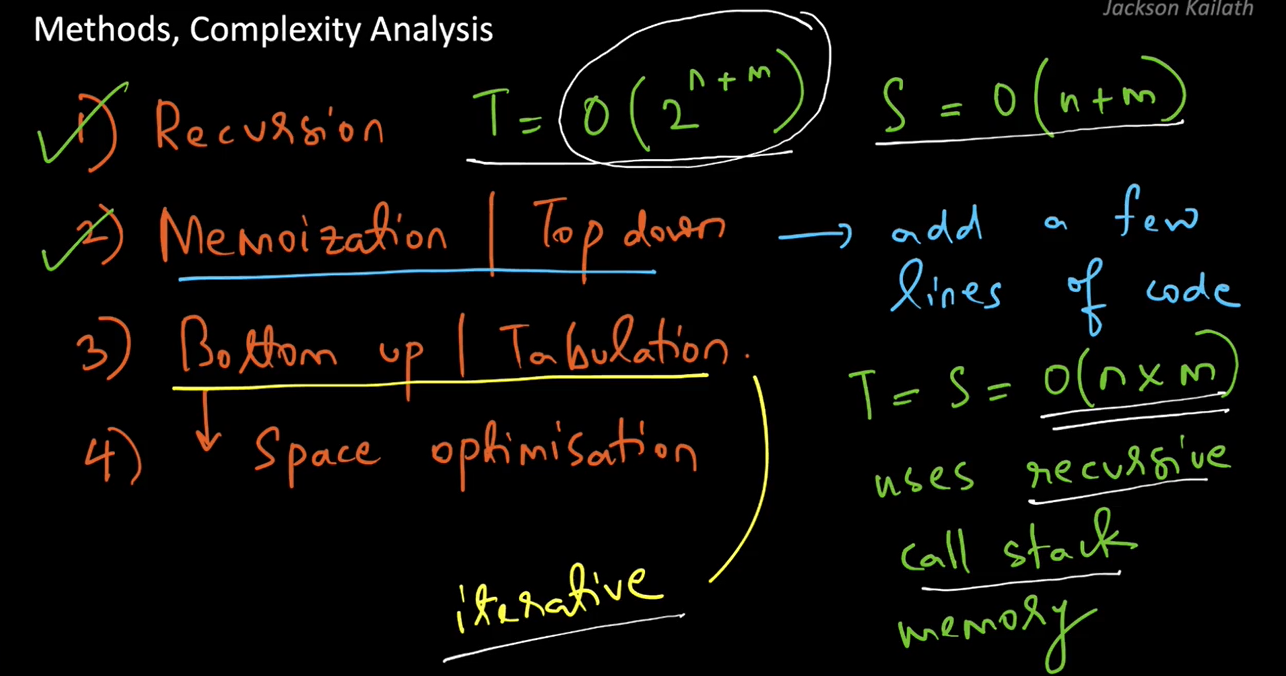
### first we construct 2-d dp_table with rows and columns equals to (n+1) and (m+1) respectively where n and m are lengths of given strings,
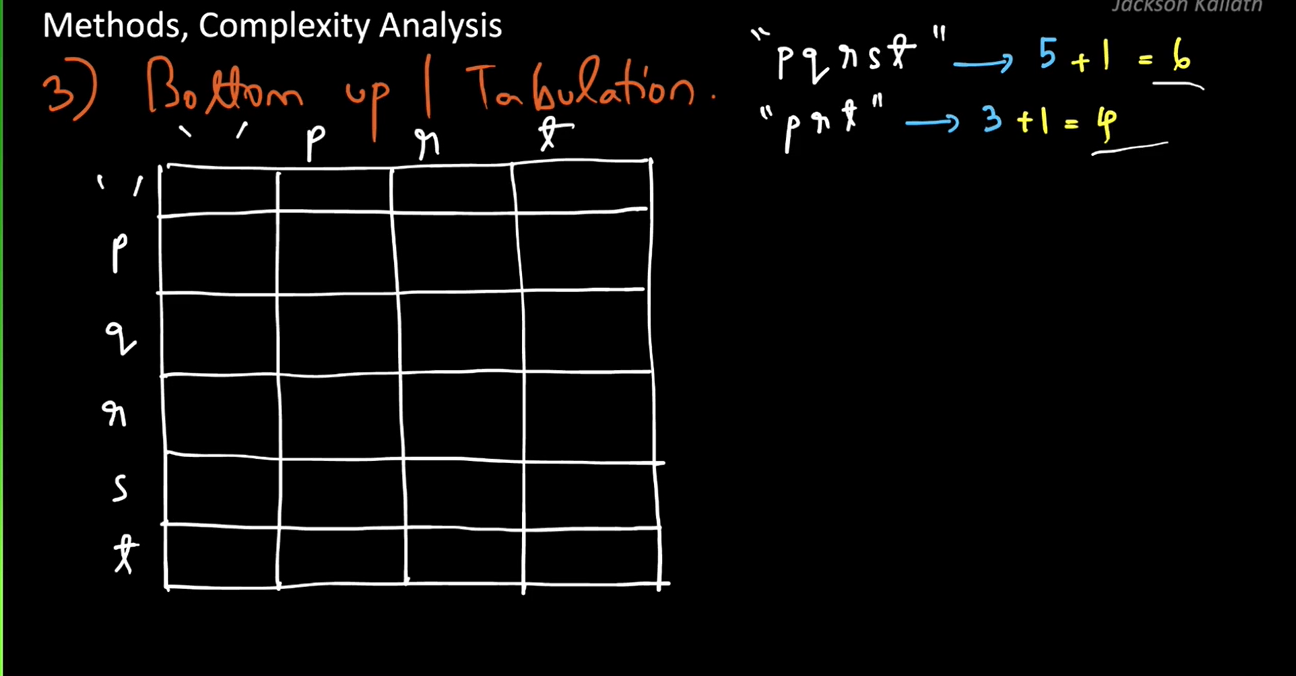 
### here we add extra-colm and extra row which is also be called as based-conditioned row and column, in this based-conditioned column and row we have to fill zero //as there is no chars availabe in given either strings to be matched with other string , and its also the base-cases(where indexes goes beyound last element of either strings= index1>n-1 or index2>m-1) 
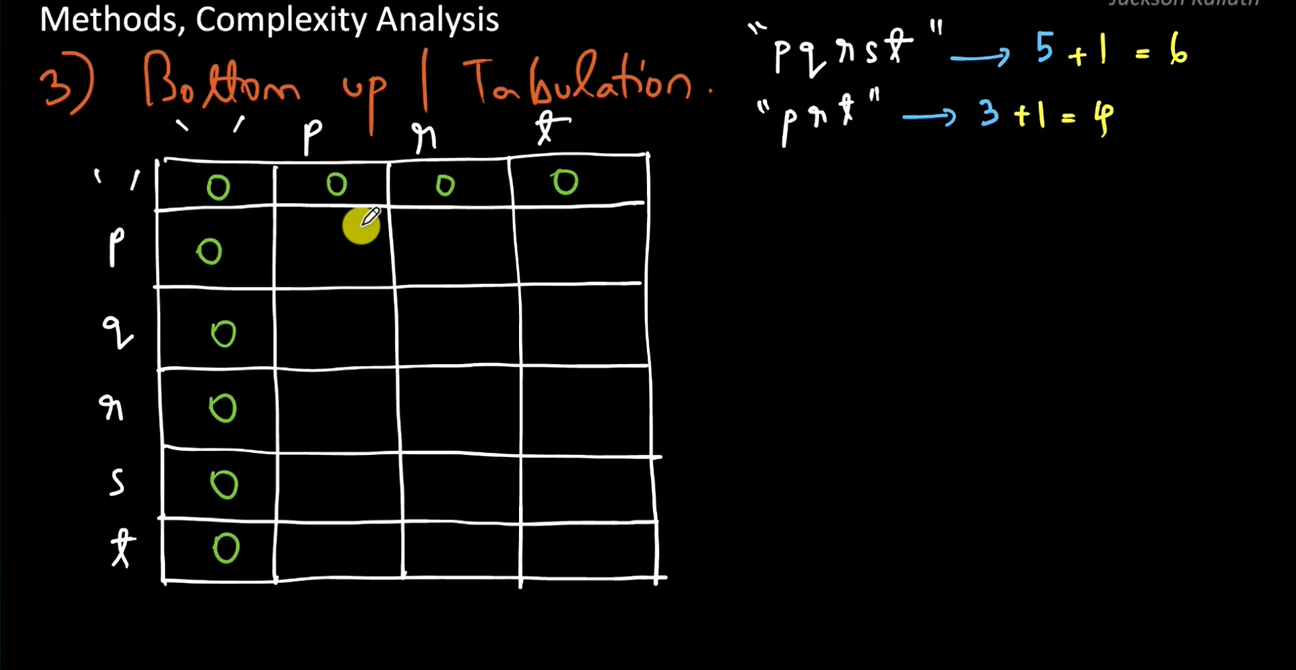
### now we iteretively fill the value in the cell(at subproblem) of dp_table using these formulas:
### if char of two strings matched (equal to each other) then value in the corresponding cell will be equals to 1+ left-diagonal value(value at last row that we just filled-up):  if  chars matched(equal: i==j) = 1 + dp[i-1][j-1]
### if char of two strings not matched (not equal to each other) then value in the corresponding cell will be calculate using this formula:
### if chars NOT mached(i != j) : max (dp[i-1][j], dp[i][j-1] ) 
### where dp[i-1][j] is Top value //value just filled at last row, just above the current cell(as j not changed here) 
### where dp[i][j-1] is Left value // adjacent value just filled at last column . just on left-side of the current cell(as i not changed here) 

### lastly major solution to the problem at hand will be the value of cell at far-right-bottom ; d[n][m]
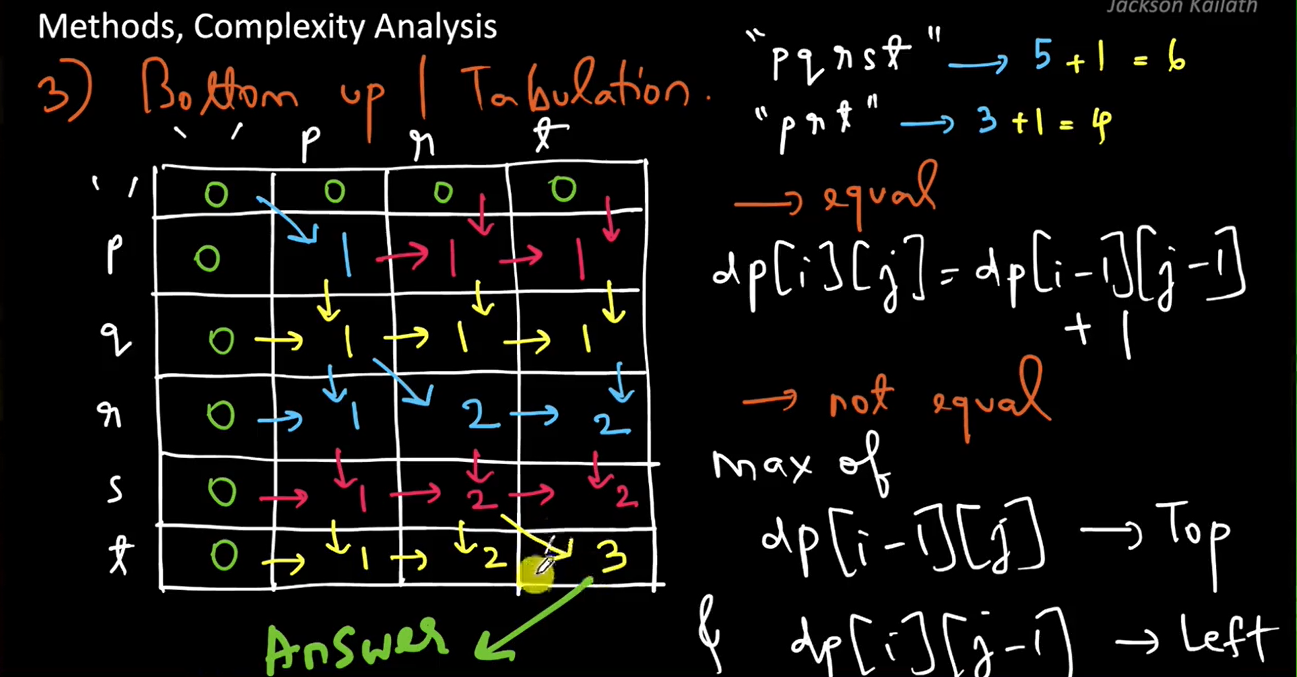 

# longest common subsequence tabulation(bottom-up) approach [complexity]:
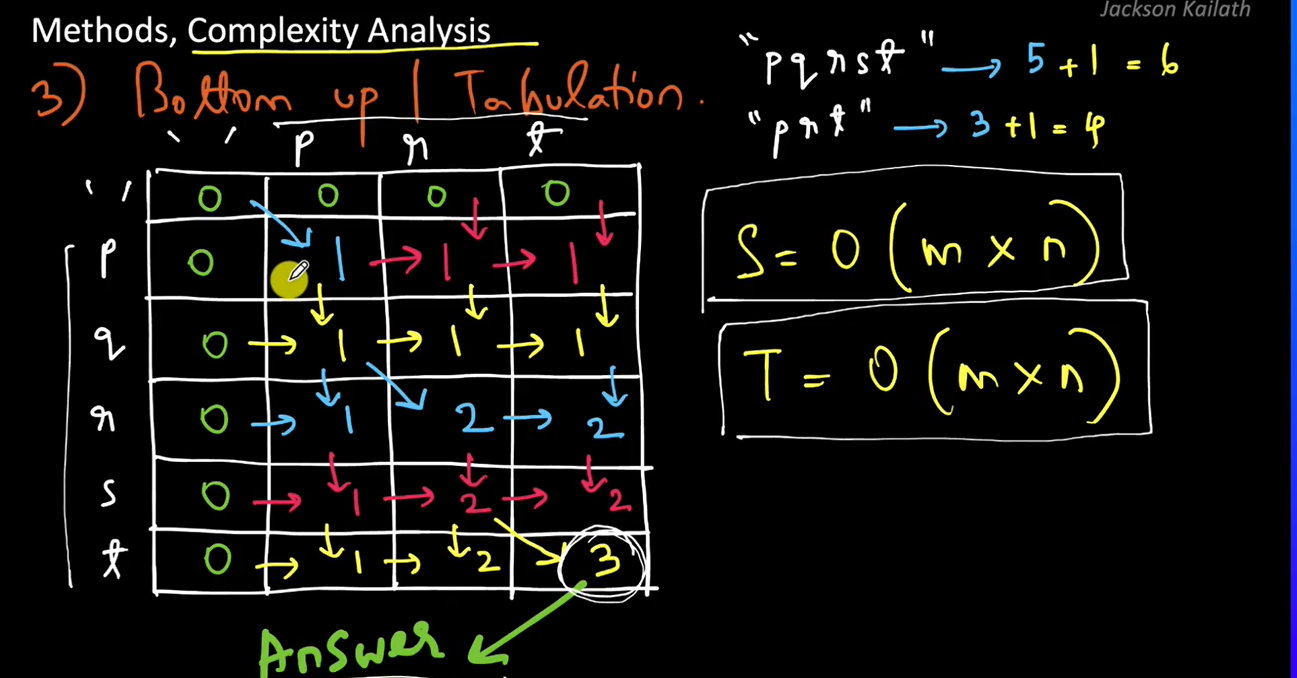

# longest common subsequence tabulation(bottom-up) approach [code implementation]:
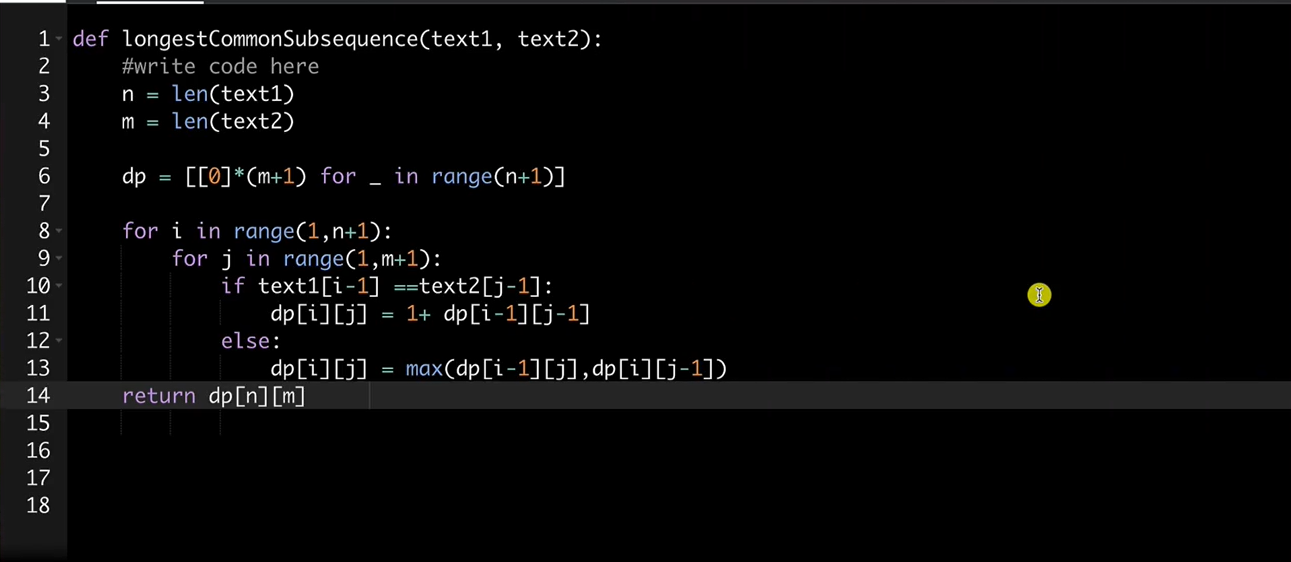


In [2]:
# code implementation:
def longestCommonSubsequence(text1, text2):
    # as here we're gien two strings with var text-1 and tex-2
    n = len(text1)  # length of string1
    m = len(text2)  # length of string2
    #now construct 2-d dp_table(tabulation) witn m+1-columns and n+1-rows all cell in the table initialised with 0
    dp = [[0]*(m+1) for _ in range(n+1)]
    
    #base-conditioned rows and colms should be remained zero 
    # so we will start iteration from index-1 for rows and colmns
    for i in range(1,n+1):  # for rows
        for j in range(1,m+1):  # for columns
            # if chars of strings matched (equal) then value at current-cell will be the equal to top-left(diagonal) value at last row
            if text1[i-1] ==text2[j-2]:  # here we're using i-1 and j-2 becuse given strings is 0-indexed 
                dp[i][j] = 1+ dp[i-1][j-1]  # remember here i-1 and j-1 for dp_table is denoting the last row and last colmn
            
            #in case chars of strings not matched (NOt equal) then value at current-cell will be the max(top-cell-value, adjacent-left-cell value)  
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])    
    # major solution to the problem at hand will be the value of cell at far right-bottom of dp_table ; dp[n][m]
    return dp[n][m]

#example usage :
txt1 =  "pbcdqaflaz"                
txt2 =  "pcqaazex"
print(longestCommonSubsequence(txt1,txt2))  # should be 6 //pcqaaz              

tx1 =  "aloha"                
tx2 =  "ohha"    
print(longestCommonSubsequence(tx1,tx2))  # should be 3 //oha               
            

6
3


In [4]:
def longestCommonSubsequence(text1, text2):
    n = len(text1)
    m = len(text2)
    dp = [[0]*(m+1) for _ in range(n+1)]
    for i in range(1,n+1):
        for j in range(1,m+1):
            if text1[i-1]==text2[j-1]:
                dp[i][j]=1+dp[i-1][j-1]
            else:
                dp[i][j]=max(dp[i-1][j],dp[i][j-1])
    return dp[n][m]                

#example usage :
txt1 =  "pbcdqaflaz"                
txt2 =  "pcqaazex"
print(longestCommonSubsequence(txt1,txt2))  # should be 6 //pcqaaz              

tx1 =  "aloha"                
tx2 =  "ohha"    
print(longestCommonSubsequence(tx1,tx2))  # should be 3 //oha               
            

6
3


# longest-common subsequence problem solving through SPACE-OPTIMIZED tabulation(bottom-up)-approach:
### so further soace can be optimised using space optimised tabulation approach in which instead of constructing the whole  2-d  dp_table here we will be constructing two arrays (1-d) one denotes previous/last-row of dp_table and another denotes current-row of dp_table
### as for calculating the cell values at ongoing-row of dp_table we only need current/ongoing row and previous/last-row
### after each time, calculating all the cell-values of current-row we have to swap both rows : current-row will be copied in to previous/last-row.

### and major solution to the problem at hand will be the last-value of final current-row 
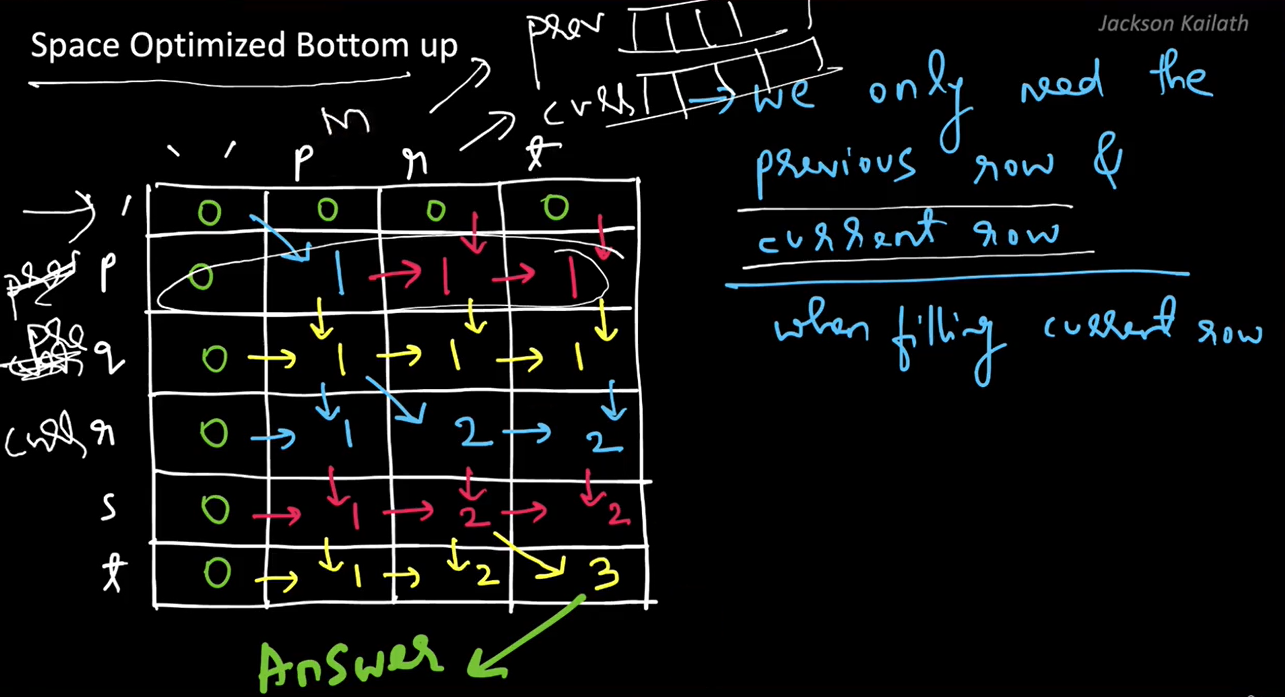
# longest-common subsequence problem solving through SPACE-OPTIMIZED tabulation(bottom-up)-approach[complexity]:
### space complexity will be now of order (row-length or  number of columns): O(m)
### we can samrtly further optimized this space complexity if we choose the smaller-length among lengths of given strings : min(n,m) 
### and make number of columns of dp_table equals to smaller-length+1.
### in that way out current-row(array-1) and last-row(array-2) will have smaller length to traverse and fill the values
### so sc= O(min (n,m) )   and tc = (n*m)
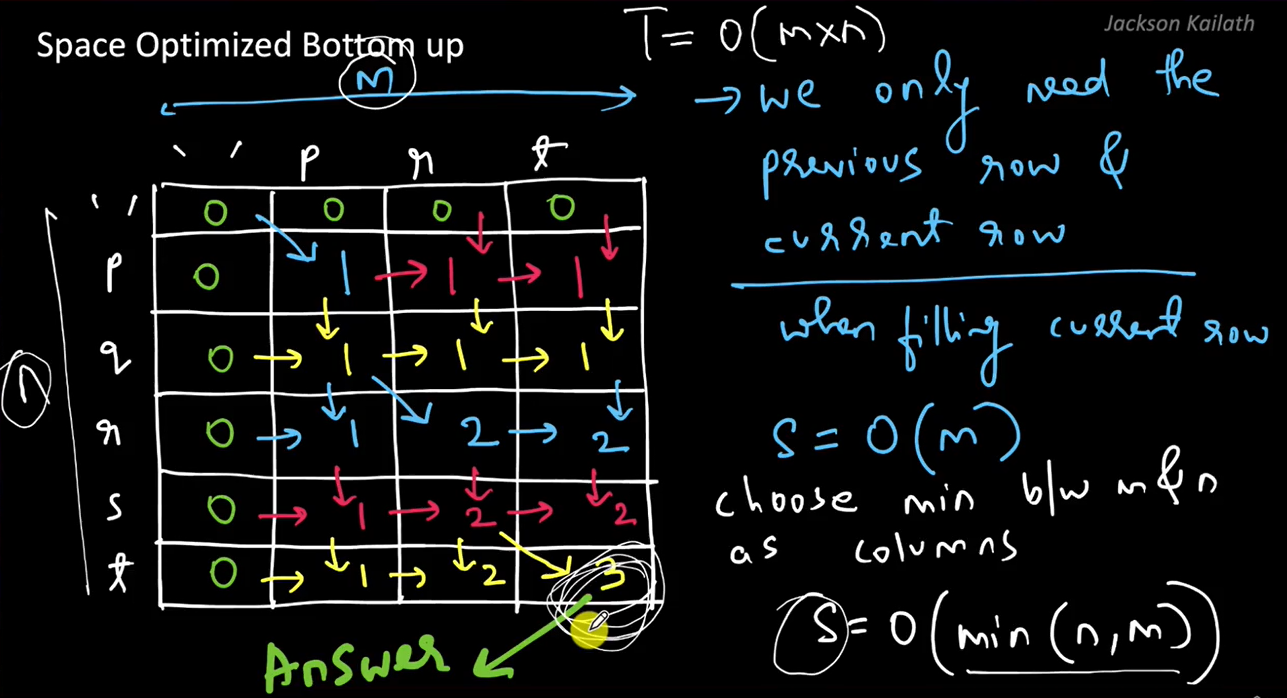
# longest-common subsequence problem solving through SPACE-OPTIMIZED tabulation(bottom-up)-approach[code-implementation]:
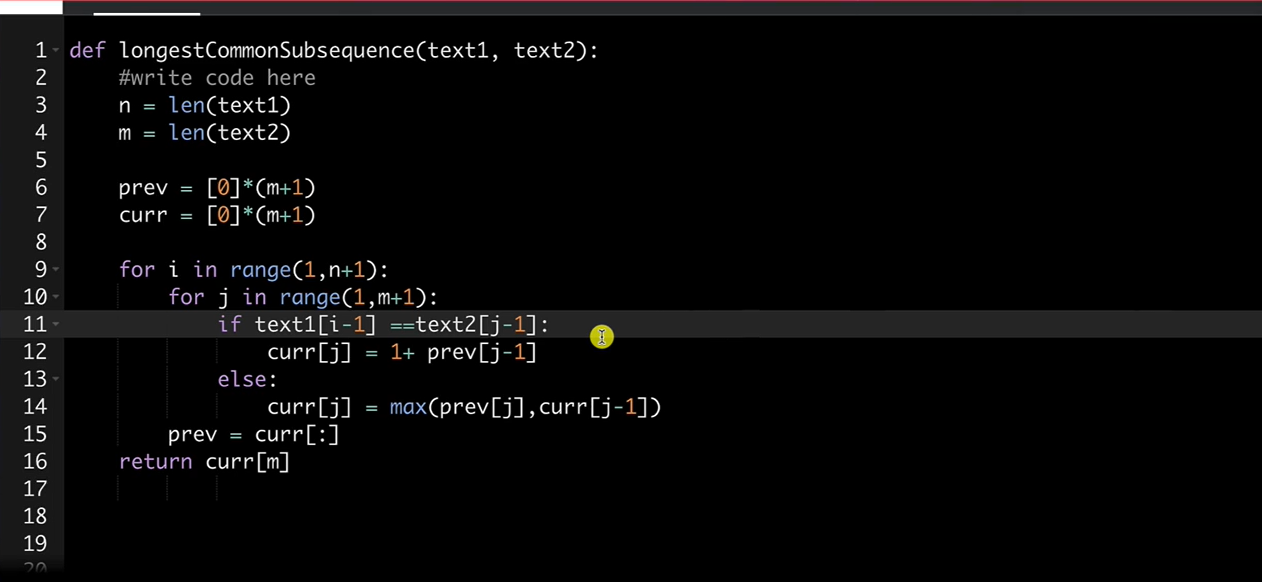


In [6]:
#code implementation for solving the longest common subsequence problem through space optimised tabulation approach.
# code implementation:
def longestCommonSubsequence(text1, text2):
    # as here we're gien two strings with var text-1 and tex-2
    n = len(text1)  # length of string1
    m = len(text2)  # length of string2
    
    #now constructing two 1-d arrays(1. prev-row , 2. curr-row) witn length or columns euquals to min(n,m)[ precribed for further space optimisation]
    prev = [0]*(m+1)
    curr = [0]*(m+1)
    
    #base-conditioned rows and colms should be remained zero 
    # so we will start iteration from index-1 for rows and colmns
    for i in range(1,n+1):  # for rows
        for j in range(1,m+1):  # for columns
            # if chars of strings matched (equal) then value at current-cell will be the equal to top-left(diagonal) value at last row
            if text1[i-1] ==text2[j-2]:  # here we're using i-1 and j-2 becuse given strings is 0-indexed 
                curr[j] = 1+ prev[j-1]  # remember  j-1 for dp_table is denoting the last colmn of prev-row
            
            #in case chars of strings not matched (NOt equal) then value at current-cell will be the max(prev-row's top-cell-value, current-rows's adjacent-left-cell value)  
            else:
                curr[j] = max(prev[j] , curr[j-1]) 
        #Swapping after each curr-row values filled : copying the all curr-row values to the prev-row
        prev = curr[:]    
    #major solution to the problem at hand will be the last-value of final current-row ; curr[m]
    return curr[m]

#example usage :
txt1 =  "pbcdqaflaz"                
txt2 =  "pcqaazex"
print(longestCommonSubsequence(txt1,txt2))  # should be 6 //pcqaaz              

tx1 =  "aloha"                
tx2 =  "ohha"    
print(longestCommonSubsequence(tx1,tx2))  # should be 3 //oha               
            

6
3


In [9]:
def longestCommonSubsequence(text1, text2):
    n = len(text1)
    m = len(text2)
    
    prev = [0]*(m+1)
    curr = [0]*(m+1)

    for i in range(1,n+1):
        for j in range(1,m+1):
            if text1[i-1]==text2[j-1]:
                curr[j]=1+prev[j-1]
            else:
                curr[j]=max(prev[j],curr[j-1])
        prev = curr[:]        
    return curr[m]         

In [8]:
#code implementation for solving the longest common subsequence problem through space optimised tabulation approach.
# code implementation:  space complexity here futher optimised using concept of sc = O(min(n,m))
def longestCommonSubsequence(text1, text2):
    # as here we're gien two strings with var text-1 and tex-2
    n = len(text1)  # length of string1
    m = len(text2)  # length of string2
    
    #now constructing two 1-d arrays(1. prev-row , 2. curr-row) witn length or columns euquals to min(n,m)[ precribed for further space optimisation]
    prev = [0]*(min(m,n)+1)
    curr = [0]*(min(m,n)+1)
    
    #base-conditioned rows and colms should be remained zero 
    # so we will start iteration from index-1 for rows and colmns
    for i in range(1,max(m,n)+1):  # for making rows of larger legnth(among m,n)
        for j in range(1,min(m,n)+1):  # for making columns of smaller legnth(among m,n)
            # if chars of strings matched (equal) then value at current-cell will be the equal to top-left(diagonal) value at last row
            if text1[i-1] ==text2[j-2]:  # here we're using i-1 and j-2 becuse given strings is 0-indexed 
                curr[j] = 1+ prev[j-1]  # remember  j-1 for dp_table is denoting the last colmn of prev-row
            
            #in case chars of strings not matched (NOt equal) then value at current-cell will be the max(prev-row's top-cell-value, current-rows's adjacent-left-cell value)  
            else:
                curr[j] = max(prev[j] , curr[j-1]) 
        #Swapping after each curr-row values filled : copying the all curr-row values to the prev-row
        prev = curr[:]    
    #major solution to the problem at hand will be the last-value of final current-row ; curr[m]
    return curr[m]

#example usage :
txt1 =  "pbcdqaflaz"                
txt2 =  "pcqaazex"
print(longestCommonSubsequence(txt1,txt2))  # should be 6 //pcqaaz              

tx1 =  "aloha"                
tx2 =  "ohha"    
print(longestCommonSubsequence(tx1,tx2))  # should be 3 //oha               
            

6
3
